This project is to find the Top 20 Highest Earning Athletes of all time in 2021

In [25]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Define the URL name
athlete_url = 'https://www.businessinsider.com/ranked-the-20-highest-earning-athletes-of-all-time-2021-11'

# User Agent String: This user agent string is then passed in the headers of the HTTP request.
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}

# Getting a response from the URL
response = requests.get(athlete_url, headers=headers)

# Checking the status code
response.status_code

200

In [27]:
# Download the page locally in HTML to identify contents instead of printing in python
# Defining the page into text format(html)
page_contents = response.text

# Checking the contents
print(page_contents)

<!DOCTYPE html> <html lang="en-US"> <head> <title>RANKED: the 20 Highest Earning Athletes of All-Time</title> <meta charset="UTF-8"> <meta name="viewport" content="width=device-width,initial-scale=1"> <meta name="title" content="RANKED: The 20 highest earning athletes of all-time"> <meta name="datePublished" content="2021-11-06T10:38:00Z"> <meta name="dateModified" content="2021-11-06T10:38:10Z"> <meta name="news_keywords" content="Sports, Soccer, NBA, NFL, Golf, Boxing"> <meta name="description" content="The list, based on data from Sportico, is topped by NBA legend Michael Jordan, who has earned an astonishing $2.05 billion."> <meta property="author" content="Barnaby Lane"> <meta property="article:publisher" content="businessinsider"> <meta name="tbi-vertical" content="Sports"> <meta property="og:title" content="RANKED: The 20 highest earning athletes of all-time"> <meta property="og:description" content="The list, based on data from Sportico, is topped by NBA legend Michael Jordan, 

In [28]:
# Create a BeautifulSoup object
soup = BeautifulSoup(page_contents, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   RANKED: the 20 Highest Earning Athletes of All-Time
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="RANKED: The 20 highest earning athletes of all-time" name="title"/>
  <meta content="2021-11-06T10:38:00Z" name="datePublished"/>
  <meta content="2021-11-06T10:38:10Z" name="dateModified"/>
  <meta content="Sports, Soccer, NBA, NFL, Golf, Boxing" name="news_keywords"/>
  <meta content="The list, based on data from Sportico, is topped by NBA legend Michael Jordan, who has earned an astonishing $2.05 billion." name="description"/>
  <meta content="Barnaby Lane" property="author"/>
  <meta content="businessinsider" property="article:publisher"/>
  <meta content="Sports" name="tbi-vertical"/>
  <meta content="RANKED: The 20 highest earning athletes of all-time" property="og:title"/>
  <meta content="The list, based on data from Sportico, is topped by NBA lege

In [29]:
# Extract rating, athlete names and earnings
selection_class = "slide-title-text"
athlete_name_tags = soup.find_all('h2', {'class': selection_class})

athlete_name_tags

[<h2 class="slide-title-text">20. Alex Rodriguez — $515 million</h2>,
 <h2 class="slide-title-text">19. Manny Pacquiao — $550 million</h2>,
 <h2 class="slide-title-text">18. Greg Norman — $555 million</h2>,
 <h2 class="slide-title-text">17. Lewis Hamilton — $560 million</h2>,
 <h2 class="slide-title-text">=15. Kevin Durant — $580 million</h2>,
 <h2 class="slide-title-text">=15. Neymar — $580 million</h2>,
 <h2 class="slide-title-text">14. Shaquille O'Neal — $645 million</h2>,
 <h2 class="slide-title-text">13. Kobe Bryant — $750 million</h2>,
 <h2 class="slide-title-text">12. Michael Schumacher — $780 million</h2>,
 <h2 class="slide-title-text">11. Jack Nicklaus — $830 million</h2>,
 <h2 class="slide-title-text">10. David Beckham — $880 million</h2>,
 <h2 class="slide-title-text">=8. Phil Mickelson — $885 million</h2>,
 <h2 class="slide-title-text">=8. Arnold Palmer — $885 million</h2>,
 <h2 class="slide-title-text">7. Roger Federer — $1 billion</h2>,
 <h2 class="slide-title-text">=5. L

In [30]:
# create an empty list for athlete names
athlete_names = []

# Loop through each athlete name tag
for tag in athlete_name_tags:
    rank, name_earnings = tag.get_text().split('. ')
    name, earnings = name_earnings.split(' — $')
    athlete_names.append({'Rank': rank, 'Athlete Name': name.strip(), 'Earnings': earnings})

# Create a DataFrame for athlete data
athlete_df = pd.DataFrame(athlete_names)

# Convert earnings to numeric values (remove "million" or "billion")
athlete_df['Earnings'] = athlete_df['Earnings'].apply(lambda x: int(float(x.replace(" million", "").replace(" billion", "")) * 1e6 if "million" in x.lower() else float(x.replace(" billion", "")) * 1e9))

athlete_df

,Rank,Athlete Name,Earnings
0,20,Alex Rodriguez,515000000
1,19,Manny Pacquiao,550000000
2,18,Greg Norman,555000000
3,17,Lewis Hamilton,560000000
4,=15,Kevin Durant,580000000
5,=15,Neymar,580000000
6,14,Shaquille O'Neal,645000000
7,13,Kobe Bryant,750000000
8,12,Michael Schumacher,780000000
9,11,Jack Nicklaus,830000000


In [31]:
# Extract Sport and Nationality data
paragraphs = soup.find_all('p')

paragraphs

[<p><strong>Sport: </strong>Baseball</p>,
 <p><strong>Nationality:</strong> American</p>,
 <p><strong>Sport: </strong>Boxing</p>,
 <p><strong>Nationality:</strong> Filipino </p>,
 <p><strong>Sport: </strong>Golf</p>,
 <p><strong>Nationality:</strong> Australian</p>,
 <p><strong>Sport: </strong>Formula One</p>,
 <p><strong>Nationality:</strong> English</p>,
 <p><strong>Sport: </strong>Basketball</p>,
 <p><strong>Nationality:</strong> American</p>,
 <p><strong>Sport: </strong>Soccer</p>,
 <p><strong>Nationality:</strong> Brazilian</p>,
 <p><strong>Sport: </strong>Basketball</p>,
 <p><strong>Nationality:</strong> American</p>,
 <p><strong>Sport: </strong>Basketball</p>,
 <p><strong>Nationality:</strong> American</p>,
 <p><strong>Sport: </strong>Formula One</p>,
 <p><strong>Nationality:</strong> German</p>,
 <p><strong>Sport: </strong>Golf</p>,
 <p><strong>Nationality:</strong> American</p>,
 <p><strong>Sport: </strong>Soccer</p>,
 <p><strong>Nationality:</strong> English</p>,
 <p><strong>

In [32]:
# create an empty list for athlete_data
athlete_data = []

# Loop through each paragraph and extract Sport and Nationality
for i in range(0, len(paragraphs), 2):
    strong_sport = paragraphs[i].find('strong')
    strong_nationality = paragraphs[i + 1].find('strong')
    
    if strong_sport and strong_nationality:
        name = athlete_df.loc[i // 2, 'Athlete Name']
        sport = strong_sport.next_sibling.strip()
        nationality = strong_nationality.next_sibling.strip()
        athlete_data.append({'Athlete Name': name, 'Sport': sport, 'Nationality': nationality})

# Create a DataFrame for Sport and Nationality data
sport_nationality_df = pd.DataFrame(athlete_data)

sport_nationality_df

,Athlete Name,Sport,Nationality
0,Alex Rodriguez,Baseball,American
1,Manny Pacquiao,Boxing,Filipino
2,Greg Norman,Golf,Australian
3,Lewis Hamilton,Formula One,English
4,Kevin Durant,Basketball,American
5,Neymar,Soccer,Brazilian
6,Shaquille O'Neal,Basketball,American
7,Kobe Bryant,Basketball,American
8,Michael Schumacher,Formula One,German
9,Jack Nicklaus,Golf,American


In [33]:
# Concat the two DataFrames based on Athlete Name
final_df = pd.concat([athlete_df, sport_nationality_df], axis=1)

# Print the final DataFrame
print(final_df)

   Rank        Athlete Name    Earnings        Athlete Name        Sport  \
0    20      Alex Rodriguez   515000000      Alex Rodriguez     Baseball   
1    19      Manny Pacquiao   550000000      Manny Pacquiao       Boxing   
2    18         Greg Norman   555000000         Greg Norman         Golf   
3    17      Lewis Hamilton   560000000      Lewis Hamilton  Formula One   
4   =15        Kevin Durant   580000000        Kevin Durant   Basketball   
5   =15              Neymar   580000000              Neymar       Soccer   
6    14    Shaquille O'Neal   645000000    Shaquille O'Neal   Basketball   
7    13         Kobe Bryant   750000000         Kobe Bryant   Basketball   
8    12  Michael Schumacher   780000000  Michael Schumacher  Formula One   
9    11       Jack Nicklaus   830000000       Jack Nicklaus         Golf   
10   10       David Beckham   880000000       David Beckham       Soccer   
11   =8      Phil Mickelson   885000000      Phil Mickelson         Golf   
12   =8     

In [34]:
# Export the final DataFrame to a CSV file
final_df.to_csv("highest_paid_athletes.csv", index=False)

final_df

,Rank,Athlete Name,Earnings,Athlete Name,Sport,Nationality
0,20,Alex Rodriguez,515000000,Alex Rodriguez,Baseball,American
1,19,Manny Pacquiao,550000000,Manny Pacquiao,Boxing,Filipino
2,18,Greg Norman,555000000,Greg Norman,Golf,Australian
3,17,Lewis Hamilton,560000000,Lewis Hamilton,Formula One,English
4,=15,Kevin Durant,580000000,Kevin Durant,Basketball,American
5,=15,Neymar,580000000,Neymar,Soccer,Brazilian
6,14,Shaquille O'Neal,645000000,Shaquille O'Neal,Basketball,American
7,13,Kobe Bryant,750000000,Kobe Bryant,Basketball,American
8,12,Michael Schumacher,780000000,Michael Schumacher,Formula One,German
9,11,Jack Nicklaus,830000000,Jack Nicklaus,Golf,American


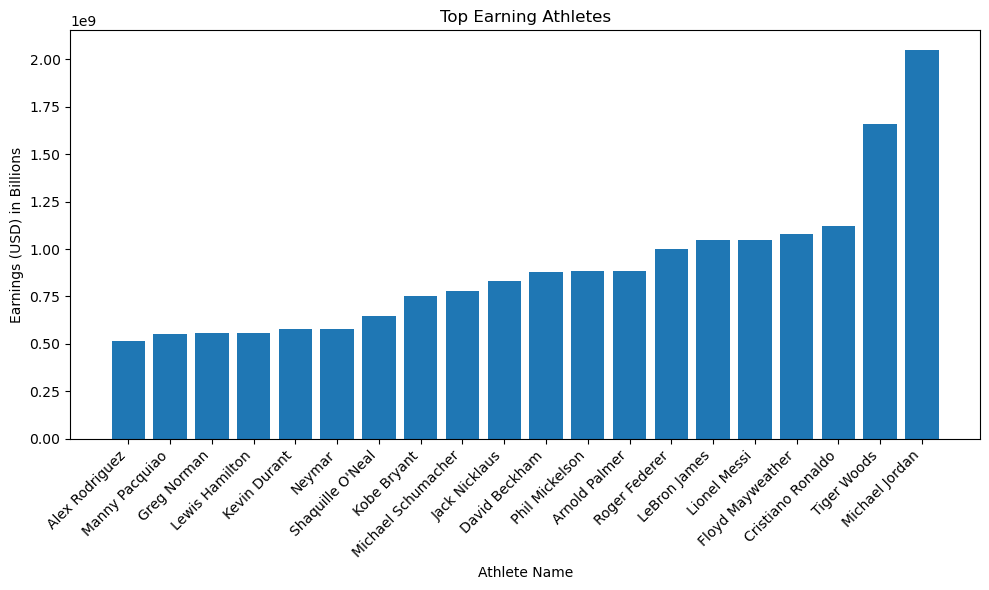

In [35]:
# Plot a bar chart for the earnings

plt.figure(figsize=(10, 6))

# plt.bar(df['Athlete Name'], df['Earnings'])

plt.bar(athlete_df['Athlete Name'], athlete_df['Earnings'])
plt.xlabel('Athlete Name')
plt.ylabel('Earnings (USD) in Billions')
plt.title('Top Earning Athletes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

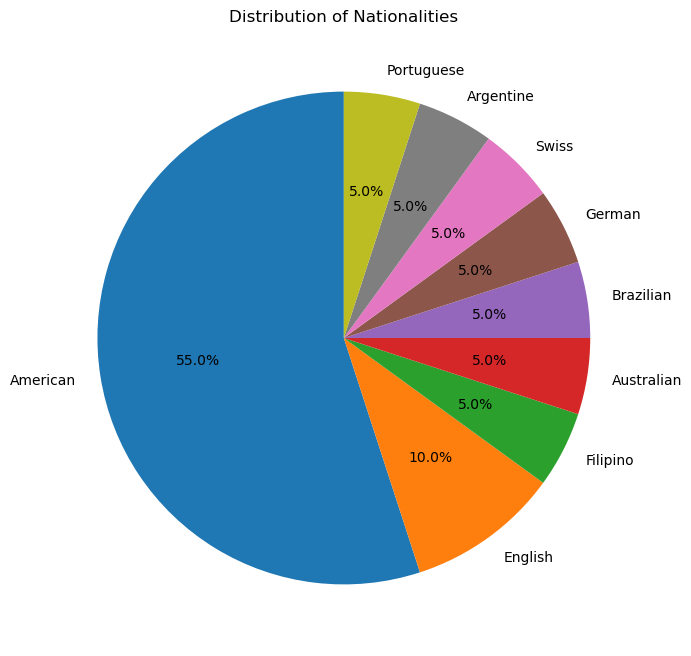

In [36]:
# Plot a pie chart for the distribution of nationalities

nationality_counts = final_df['Nationality'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Nationalities')
plt.show()

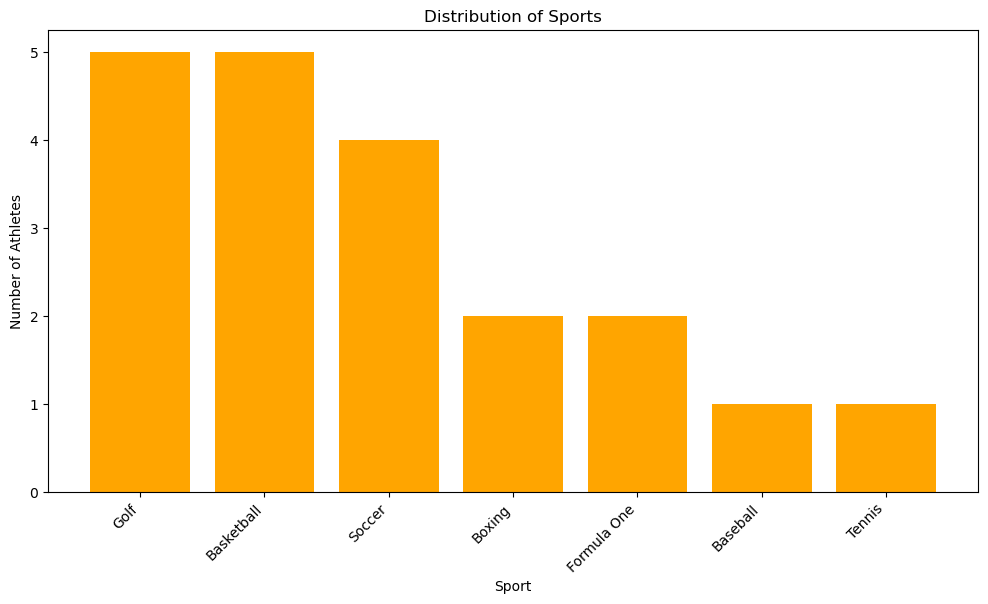

In [37]:
# Plot a bar chart for the distribution of sports

sport_counts = final_df['Sport'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(sport_counts.index, sport_counts, color='orange')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Sports')
plt.xticks(rotation=45, ha='right')
plt.show()